In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
! pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=d2fd22ee763967c933a50af9086bae1aa7d2e58ce1af2389c0abc98ad82b1519
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [3]:
from os import terminal_size
import imgaug.augmenters as augment
import cv2
import numpy as np
import pandas as pd
import os
from random import shuffle
from tqdm import tqdm
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
IMG_SIZE = 224
counter=0
train_data = []
test_data=[]
counter_train=0
counter_test=0
def getLabel(imageName):
 
    if imageName.find('Basketball')!=-1:
        return [1,0,0,0,0,0]
    elif imageName.find('Football')!=-1:
        return  [0, 1, 0, 0, 0,0]
    elif imageName.find('Rowing')!=-1:
        return  [0, 0, 1, 0, 0,0]
    elif imageName.find('Swimming')!=-1:
        return  [0, 0, 0, 1, 0,0]
    elif imageName.find('Tennis')!=-1:
        return  [0, 0, 0, 0, 1,0]
    elif imageName.find('Yoga')!=-1:
        return  [0, 0, 0, 0, 0,1]

In [5]:
def getTrainData():
    #data_augmentation = tf.keras.Sequential([layers.RandomFlip("horizontal_and_vertical"),layers.RandomRotation(0.2),])
    
    for image in tqdm(os.listdir('/kaggle/input/nn23-sports-image-classification/Train')):
        path = os.path.join('/kaggle/input/nn23-sports-image-classification/Train', image)
        img_data = cv2.imread(path)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        label=getLabel(image)
        
        images_list=getAugmentation(img_data)
        for i in images_list:
            train_data.append([i,label])
       
 
    shuffle(train_data)
 
    np.save('train_data_p.npy', train_data)
    #print(list[0],'\n ',list[1],'\n',list[2],'\n',list[3],'\n',list[4],'\n',list[5],'\n')
    return train_data

In [6]:
def getAugmentation(image):
    hflip = augment.Fliplr(p=1.0)
    image_hf = hflip.augment_image(image)

    vflip = augment.Flipud(p=1.0)
    image_vf = vflip.augment_image(image)

    rot1 = augment.Affine(rotate=(-50, 20))
    image_rot1 = rot1.augment_image(image)

    rot2 = augment.Affine(rotate=(20, -50))
    image_rot2 = rot1.augment_image(image)

    crop1 = augment.Crop(percent=(0, 0.3))
    image_crop1 = crop1.augment_image(image)

    shear = augment.Affine(shear=(-40, 40))
    image_shear = shear.augment_image(image)

    return [image,image_hf,image_vf,image_rot1,image_crop1,image_shear,image_rot2]

In [7]:
IMG_SIZE=224
if (os.path.exists('/kaggle/working/train_data_p.npy')):
    train_data =np.load('train_data_p.npy',allow_pickle=True)
else:
 train_data = getTrainData()
x_train= np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)# all image, size of image , size of image , grayScale
y_train= np.array([i[1] for i in train_data])

100%|██████████| 1681/1681 [00:25<00:00, 65.33it/s]
/opt/conda/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [8]:

model = Sequential()


model.add(tf.keras.Input(shape=(224,224,3,)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
    
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(6, activation='softmax'))

optAdam = tf.keras.optimizers.Adam(learning_rate=0.000001)

model.compile(
    optimizer=optAdam, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping
earlyy = EarlyStopping(patience=100)
history = model.fit(x_train, y_train, epochs=500, validation_split=0.2, batch_size=40, callbacks=[earlyy])


Train on 9413 samples, validate on 2354 samples


2022-12-15 19:33:14.706944: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 19:33:14.708007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 19:33:14.872710: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 19:33:14.873789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 19:33:14.874834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/500


2022-12-15 19:33:20.970513: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


9413/9413 [==============================] - ETA: 0s - loss: 7.1987 - acc: 0.1947

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


9413/9413 [==============================] - 28s 3ms/sample - loss: 7.1987 - acc: 0.1947 - val_loss: 1.7532 - val_acc: 0.3760
Epoch 2/500
9413/9413 [==============================] - 17s 2ms/sample - loss: 2.5093 - acc: 0.2647 - val_loss: 1.5383 - val_acc: 0.4184
Epoch 3/500
9413/9413 [==============================] - 18s 2ms/sample - loss: 1.8956 - acc: 0.2993 - val_loss: 1.5085 - val_acc: 0.4329
Epoch 4/500
9413/9413 [==============================] - 18s 2ms/sample - loss: 1.7509 - acc: 0.3187 - val_loss: 1.4871 - val_acc: 0.4520
Epoch 5/500
9413/9413 [==============================] - 18s 2ms/sample - loss: 1.6958 - acc: 0.3250 - val_loss: 1.4595 - val_acc: 0.4537
Epoch 6/500
9413/9413 [==============================] - 18s 2ms/sample - loss: 1.6393 - acc: 0.3449 - val_loss: 1.4229 - val_acc: 0.4839
Epoch 7/500
9413/9413 [==============================] - 18s 2ms/sample - loss: 1.6300 - acc: 0.3449 - val_loss: 1.4139 - val_acc: 0.4864
Epoch 8/500
9413/9413 [=======================

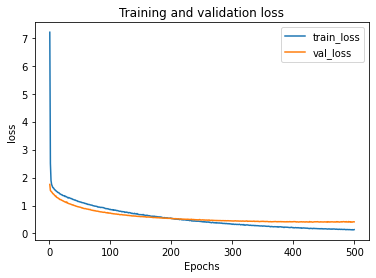

In [16]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(history, 'loss')

In [17]:
model.save('firstModel.tfl')

In [18]:
def predict():
    predictions = []
    for image in tqdm(os.listdir('/kaggle/input/nn23-sports-image-classification/Test')):
        path = os.path.join('/kaggle/input/nn23-sports-image-classification/Test', image)
        img_data = cv2.imread(path)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE)).reshape(-1,IMG_SIZE,IMG_SIZE,3)
        idx = 0
        value = 0
        cnt = 0
        p = model.predict([np.array(img_data)])[0]
        for j in p:
            if j > value:
                value = j
                idx = cnt
            cnt += 1
        predictions.append([image, idx])
    return predictions

In [19]:
predictions = predict()

100%|██████████| 688/688 [00:08<00:00, 80.42it/s] 


In [21]:
labels = pd.DataFrame(predictions, columns=['image_name', 'label'])

In [22]:
labels.to_csv('firstModel.csv', index=False)